In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Define paths to the dataset
train_dir = 'chest_xray/train'
validation_dir = 'chest_xray/val'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 427ms/step - accuracy: 0.7184 - loss: 0.6032 - val_accuracy: 0.6250 - val_loss: 1.0216
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.0216
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 412ms/step - accuracy: 0.8271 - loss: 0.3621 - val_accuracy: 0.8750 - val_loss: 0.4658
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4658
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 441ms/step - accuracy: 0.8735 - loss: 0.2933 - val_accuracy: 0.6250 - val_loss: 0.9247
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9247
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 409ms/step - accuracy: 0.8833 - loss: 0.2752 - val_accuracy: 0.6250 - val_loss: 1.0974
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.0974
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 413ms/step - accuracy: 0.8904 - loss: 0.2469 - val_accuracy: 0.7500 - val_loss: 0.6218
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.0000

In [8]:
# Load test images
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'chest_xray/test',  # Path to the test directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to keep the order for evaluation
)

Found 624 images belonging to 2 classes.


In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.6397 - loss: 0.6756
Test Loss: 0.4113
Test Accuracy: 0.8059


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step


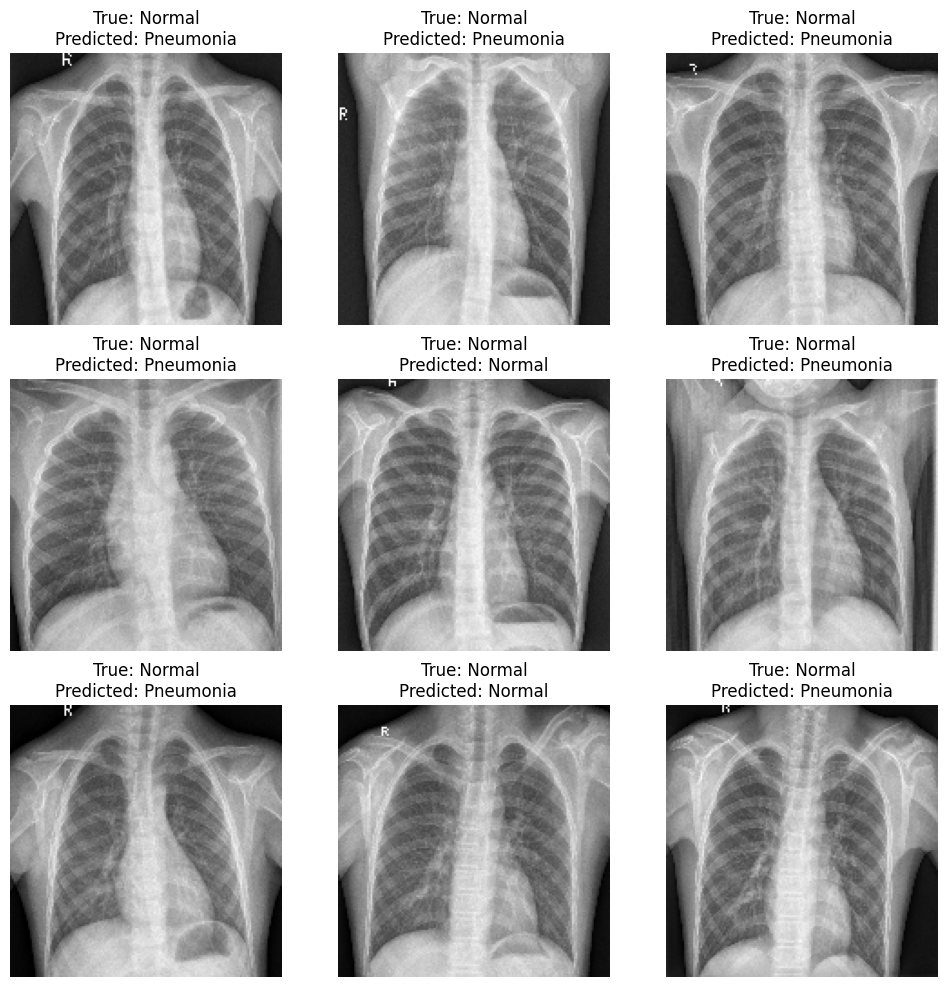

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(test_generator)

# Convert predictions to binary (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Get the true classes
true_classes = test_generator.classes

# Display some predictions
def plot_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {"Pneumonia" if true_labels[i] == 1 else "Normal"}\nPredicted: {"Pneumonia" if predicted_labels[i] == 1 else "Normal"}')
        plt.axis('off')
    plt.show()

# Get a batch of images
images, _ = next(test_generator)

# Plot predictions
plot_predictions(images, true_classes, predicted_classes)